<a href="https://colab.research.google.com/github/RafalJakobsen/School_of_AI/blob/master/Twitter_Web_Scraping_for_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 - Install Dependencies
!pip install pandas #For data pre-processing
!pip install tweepy #For accessing Twitter data
!pip install vaderSentiment #For sentiment analysis

In [0]:
#2 - Import Dependencies
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [0]:
#3 - Define Twitter API Authentication Variables
consumer_key = 'y2bwwF68CCqUwQ86EzmNxIydX'
consumer_secret = '91YknFkTzDvuUwUajrwhFZ8V4ejeCxz2obLs3BTvRbAXOwScrP'
access_token = '1092419252827627520-1JZC991bhQpPrC4Mw5Ydq51D5F1LsV'
access_token_secret = 'xOhQqozgs4gdbNUGgbc0JZadljFCSFiYVt65Bs3TnMTY0'

In [0]:
#4- Auth with Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [0]:
#5 - Define Cleaning Function
import re

def clean_tweet(tweet):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)", ' ', tweet).split())

In [0]:
#6 - Find Related Tweets
tweets = api.search('Bitcoin', count=200)

# Create a clean pandas data frame
data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets], columns=['Tweets'])

# Display the first 10 elements of the dateframe:
display(data.head(10))

# Meta Data from a single tweet
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)




,Tweets
0,RT Hmmmmmmmmm Nothing to see here folks Bitcoi...
1,Crypto Trader Predicts Nearing Alt Season as B...
2,RT Another bitcoin ATM operator has received o...
3,https t co 7uwE0VZELG
4,What to Expect When Congress Grills Facebook o...
5,RT BTC 7 15 Bitcoin https t co zIIx1ZG1Fd http...
6,RT bitcoin A little bitcoin art anybody btc ht...
7,The lack of any institutionalized futures mark...
8,840 000 Bitcoin ransom plot foiled kidnapped c...
9,En mi opini n libra no es cripto al menos no c...


1150822389133058048
2019-07-15 17:40:13
Twitter for iPhone
0
137
None
None
{'hashtags': [{'text': 'Bitcoin', 'indices': [60, 68]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CRYPTOTYTAN', 'name': 'CRYPTO TYTAN', 'id': 1463217036, 'id_str': '1463217036', 'indices': [3, 15]}], 'urls': [], 'media': [{'id': 1149502691338383360, 'id_str': '1149502691338383360', 'indices': [69, 92], 'media_url': 'http://pbs.twimg.com/media/D_Pam4GUcAAC2sa.jpg', 'media_url_https': 'https://pbs.twimg.com/media/D_Pam4GUcAAC2sa.jpg', 'url': 'https://t.co/7ZrTFh4P6T', 'display_url': 'pic.twitter.com/7ZrTFh4P6T', 'expanded_url': 'https://twitter.com/CRYPTOTYTAN/status/1149502717573791745/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 584, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 996, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 331, 'h': 680, 'resize': 'fit'}}, 'source_status_id': 1149502717573791745, 'source_status_id_str': '1149502717573791745', 's

In [0]:
# Gather lexicon data
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
#7 Go through the tweets to analyse their sentiment

sid = SentimentIntensityAnalyzer()

list = []
for index, row in data.iterrows():
    ss = sid.polarity_scores(row["Tweets"])
    list.append(ss)
se = pd.Series(list)
data['polarity'] = se.values

# We display the first 10 elements of the dataframe:
display(data.head(100))

,Tweets,polarity
0,RT Hmmmmmmmmm Nothing to see here folks Bitcoi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Crypto Trader Predicts Nearing Alt Season as B...,"{'neg': 0.152, 'neu': 0.728, 'pos': 0.119, 'co..."
2,RT Another bitcoin ATM operator has received o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,https t co 7uwE0VZELG,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,What to Expect When Congress Grills Facebook o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,RT BTC 7 15 Bitcoin https t co zIIx1ZG1Fd http...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,RT bitcoin A little bitcoin art anybody btc ht...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,The lack of any institutionalized futures mark...,"{'neg': 0.174, 'neu': 0.704, 'pos': 0.122, 'co..."
8,840 000 Bitcoin ransom plot foiled kidnapped c...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp..."
9,En mi opini n libra no es cripto al menos no c...,"{'neg': 0.164, 'neu': 0.746, 'pos': 0.09, 'com..."


In [0]:
# https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html
# COMING LATER, this is just a test

#data.polarity[0]
data.head()
type(data.Tweets)

type(data.polarity[0])
data.info()

#PolElm=pd.DataFrame.from_dict(data.polarity)
data[data.isnull().any(axis=1)].head()
data.isnull().any(axis=0)

# The most recent 10 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  list.append(ss)
  
# join tweets to a single string
words = ' '.join(data['Tweets'])
print(words)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Tweets      100 non-null object
polarity    100 non-null object
dtypes: object(2)
memory usage: 1.6+ KB
10 recent tweets:

RT @CRYPTOTYTAN: Hmmmmmmmmm 🧐

Nothing to see here folks 👌

#Bitcoin https://t.co/7ZrTFh4P6T

Crypto Trader Predicts Nearing Alt Season as Bitcoin Dominance Weakens https://t.co/Va8WYLRn6v

RT @coindesk: Another bitcoin ATM operator has received one of New York’s coveted BitLicenses. https://t.co/Kq4kLqs7cg

https://t.co/7uwE0VZELG

What to Expect When Congress Grills Facebook on Cryptocurrency https://t.co/jyEFKCarUz

RT @sougoha23sai: 【仮想通貨　ビットコイン（BTC）】暴落からの反発中。。。今後のシナリオをチャート分析7.15（Bitcoin） https://t.co/zIIx1ZG1Fd https://t.co/JPDj8vKgGs

RT @gator_bitcoin: A little #bitcoin art 🖼 anybody? #btc @Laurianna90 @CryptoBrekkie https://t.co/slK9XpSDpq

@theTorfinnOlsen The lack of any institutionalized futures market makes it fairly hard for anybody accepting bitcoi… 

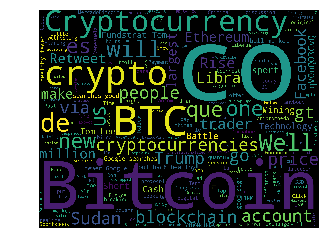

In [0]:
# Visual
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(                   
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=3800,
                      height=1400
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_10.png', dpi=300)
plt.show()